# 64x64 DCGAN experiment

## Importy + mount drive


In [1]:
# imports
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    output_path = "/content/drive/My Drive/gan_files"
    %rm -r /content/BP-Bielko-GAN-Docker
    %rm -r /content/src
    !git clone https://github.com/2021-FIIT-Bc-projects/BP-Bielko-GAN-Docker.git
    %cd BP-Bielko-GAN-Docker/gan
else:
    output_path = "."


from src.dcgan_models import *

2022-03-07 07:28:36.089989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-07 07:28:36.090050: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
list_physical_devices('GPU')

NameError: name 'list_physical_devices' is not defined

## Stiahnutie Flickr-Faces-HQ datasetu
Možnosť A: Stiahnuť dataset nanovo - veľká pravdepodobnosť vyčerpania download kvóty

Možnosť B: Načítať pred-pripravený zip súbor s datasetom 

In [ ]:
# A
# %cd /content/
!git clone https://github.com/NVlabs/ffhq-dataset.git
%cd ffhq-dataset
!python download_ffhq.py --thumbs

In [ ]:
# B
!mkdir /content/ffhq-dataset
!unzip "/content/drive/MyDrive/ffhq_dataset_thumbs/dataset_download.zip" -d "dataset_download"

In [ ]:
# C - AVATAR


## Definície modelov, funkcií - TODO real sample dict + predeterined samples prerob, sprav funkciu co nastavi rozmery

In [3]:
# model definitions

model_name = "dcgan_128_test"

p_dims = 100
p_n = 100
predetermined_inputs = np.random.randn(p_dims * p_n)  # n vectors from the normal distribution
predetermined_inputs = predetermined_inputs.reshape(p_n, p_dims)

## Vytvorenie modelu

In [4]:
height = 128
width = 128

generator = Generator(height, width, n_dim=100, n_paralell_samples=128, init_size=4)
discriminator = Discriminator(height, width, n_filters=128, dataset_path="dataset_download/thumbnails128x128")

gan = GAN(generator, discriminator, height=height, width=width, model_name=model_name, output_path=output_path)


2022-03-02 19:54:30.538081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-02 19:54:30.538872: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-02 19:54:30.539586: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (191f0c32b871): /proc/driver/nvidia/version does not exist
2022-03-02 19:54:30.543342: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument 

## TODO tieto metadata ukladaj, zapisuj do metadata list index z batch namiesto času v hod.

In [6]:
open(f'{output_path}/{model_name}/outputs/evaluation/epoch_metadata.txt', 'w').close()
metadata_list = []

## Trénovací proces

[Epoch 16] Batch 0/1400


2021-12-30 04:00:41.676678: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


[Epoch 16/18, Batch 0/1400]
        Time since start: 0:00:31.245047
        Disc. loss real: 0.6959406137466431
        Disc. loss fake: 0.6970646381378174
        Gan loss: 0.6920661926269531
        Acc. real: 1.0
        Acc. fake: 0.0 (of 100 samples)
        


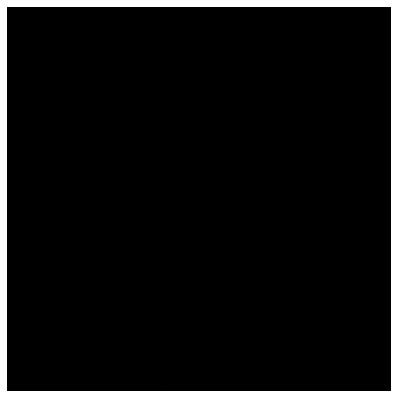

[Epoch 16] Batch 1/1400
[Epoch 16] Batch 2/1400
[Epoch 16] Batch 3/1400
[Epoch 16] Batch 4/1400
[Epoch 16] Batch 5/1400
[Epoch 16] Batch 6/1400
[Epoch 16] Batch 7/1400
[Epoch 16] Batch 8/1400


In [ ]:
from_epoch = 16
to_epoch = 18

dataset_size = 70000

a = datetime.datetime.now()

gan.train_gan(dataset_size, metadata_list,
                n_dim=100, start_epoch=from_epoch, n_epochs=to_epoch,
                n_batch=dataset_size//700, n_eval=50, eval_samples=100, n_plot=50, plot_size=9)

b = datetime.datetime.now()
print("Time taken: ", b - a)

generator.model.save_weights(f"{output_path}/{model_name}/saves/generator_{to_epoch}.hdf5", overwrite=True)
discriminator.model.save_weights(f"{output_path}/{model_name}/saves/discriminator_{to_epoch}.hdf5", overwrite=True)

In [ ]:
print(generator.model.summary())
#print(discriminator.model.summary())

NameError: ignored

In [11]:
load_epoch = 24
generator.model.load_weights(f"{output_path}/{model_name}/saves/generator_{load_epoch}.hdf5")
discriminator.model.load_weights(f"{output_path}/{model_name}/saves/discriminator_{load_epoch}.hdf5")

/home/jovyan/gan


In [ ]:
compiled_generator = Generator(height, width, n_dim=100, n_paralell_samples=128, init_size=4)
compiled_generator.model.load_weights(f"{output_path}/{model_name}/saves/generator_{4}.hdf5")

adam = Adam(lr=0.0002, beta_1=0.5)
compiled_generator.model.compile(loss='binary_crossentropy', optimizer=adam)  # metrics kvoli evaluation

print(compiled_generator.model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 2048)              206848    
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 2048)              0         
                                                                 
 reshape_6 (Reshape)         (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose_29 (Conv2D  (None, 8, 8, 128)        262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_61 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_30 (Conv2D  (None, 16, 16, 128)      262272    
 Transpose)                                          

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2022-03-02 19:58:19.017204: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


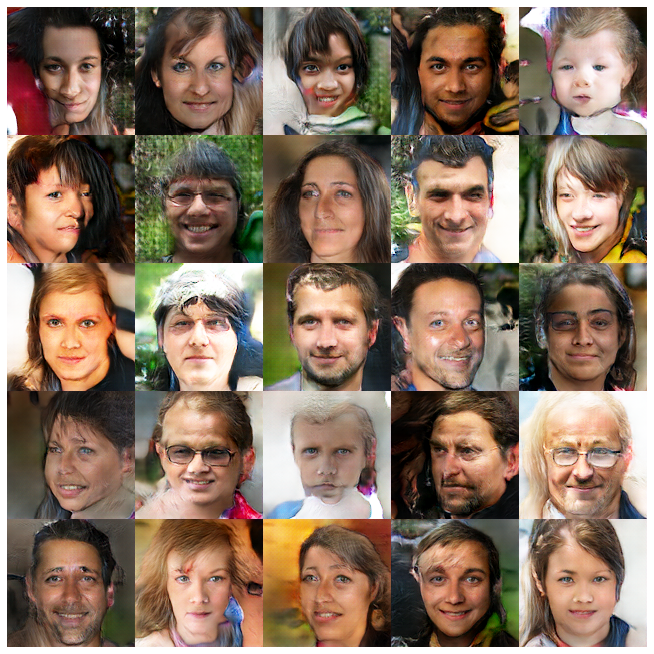

Time taken:  0:00:05.145933


In [12]:
a = datetime.datetime.now()
plot = generate_and_plot(generator, 100, predetermined_inputs, 25)
b = datetime.datetime.now()

plt.show()


print("Time taken: ", b - a)

In [31]:
import imageio

def make_anim(generator, inputs, A_index, B_index, steps, scale=1, n_dim=100):
    A = inputs[A_index]
    B = inputs[B_index]
    transition_points = latent_transition(A, B, n_dim=n_dim, n_steps=steps)

    X_output, _ = generator.generate_fake_samples(transition_points, n_dim, steps)

    outputs = float_to_rgb(X_output)
    scaled = outputs.repeat(scale, axis=1).repeat(scale, axis=2)

    images = [output for output in scaled]


    imageio.mimsave(f'anim_{A_index}_{B_index}.gif', images, duration=0.05)
    print("done")


In [32]:
make_anim(generator, points, 3, 7, 80, scale=1)

done


In [13]:
def fastRandomPointFromDistance(origin, distance, n_dims):
    distance_squared = distance ** 2
    a = np.random.uniform(size=n_dims)
    a /= sum(a)
    a *= distance_squared
    a = np.sqrt(a)
    for i, coord in enumerate(a):
        a[i] *= np.random.choice([1, -1])
    return a

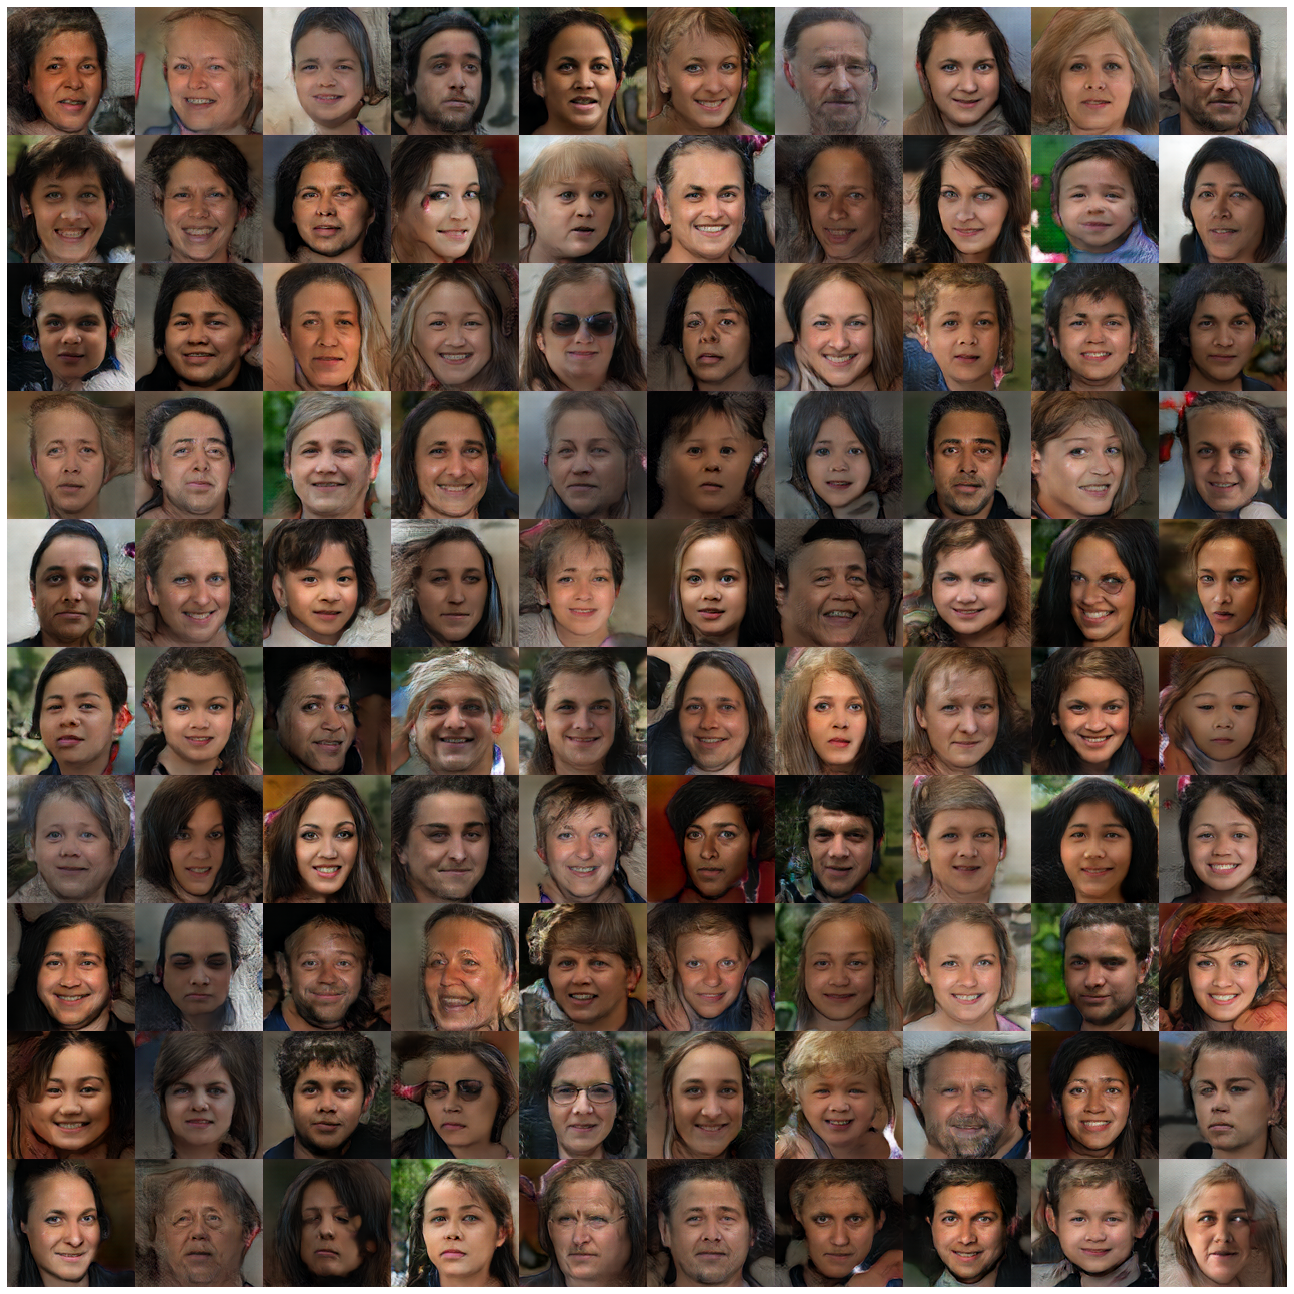

Time taken:  0:00:08.455349


In [29]:
dist = 5
samples = 100

a = datetime.datetime.now()
points = np.asarray([fastRandomPointFromDistance(np.asarray([0,0]), dist, 100) for i in range(samples)])

plot = generate_and_plot(generator, 100, points, samples)
b = datetime.datetime.now()

plt.show()


print("Time taken: ", b - a)